# Forecast kidney diseases

## Goal

The goal of this project will be to read as many stuff of the data as possible and to visualize it as best as possible, the next step will be to prepare a model which will forecast if a person has kidney disease!

But first of all. lets start with the boring stuff, imports and reading the data:

In [12]:
import pandas as pd
import numpy as np
import cufflinks as cf
import plotly.offline
import seaborn as sns
import matplotlib.pyplot as plt

cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

In [64]:
data = pd.read_csv("kidney_disease.csv") 

data = data.rename(columns={  "bp": "blood_pressure"
                                                        , "sg": "weight"
                                                        , "al": "albumin"
                                                        , "su": "sugar"
                                                        , "rbc": "red_blood_cells"
                                                        , "pc": "pus_cell"
                                                        , "pcc": "pus cell clumps"
                                                        , "ba": "bacteria"
                                                        , "bgr": "blood glucose random"
                                                        , "bu": "blood urea"
                                                        , "sc": "serum creatinine"
                                                        , "sod": "sodium"
                                                        , "pot": "potassium"
                                                        , "hemo": "hemoglobin"
                                                        , "pcv": "packed cell volume"
                                                        , "wc": "white blood cell count"
                                                        , "rc": "red blood cell count"
                                                        , "htn": "hypertension"
                                                        , "dm": "diabetes mellitus"
                                                        , "cad": "coronary artery disease"
                                                        , "appet": "appetite"
                                                        , "pe": "pedal edema"
                                                        , "ane": "anemia"
})

In [90]:
data[data.columns[1:12]].head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0


In [94]:
data[data.columns[12:26]].head()

,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


## Column Description

**id:** count of the entries in the dataset - preceding number  
**age:** age  
**bp:** blood pressure  
**sg:** specific gravity - weight  
**al:** albumin  
**su:** sugar  
**rbc:** red blood cells  
**pc:** pus cell *(Pus is the reponse of the body's to an infection, usually caused by bacteria)*  
**pcc:** if clumbs of pus cells are present or not  
**ba:** if bacteria are present or not  
**bgr:** blood glucose random *(Amount of glucose or sugar circulating in a person's blood)*  
**bu:** blood urea -   (Measures the amount of urea nitrogen that's in your blood)*  
**sc:** serum creatinine  
**sod:** sodium  
**pot:** potassium  
**hemo:** hemoglobin  
**pcv:** packed cell volume*(measures the volume percentage of red blood cells (RBC) in blood)*  
**wc:** white blood cell count  
**rc:** red blood cell count  
**htn:** hypertension *(is a long-term medical condition in which the blood pressure in the arteries is persistently elevated)*  
**dm:** diabetes mellitus (the blood sugar level is pathologically elevated)  
**cad:** coronary artery disease *(involves the reduction of blood flow to the heart muscle due to build-up of plaque in the arteries of the heart)*  
**appet:** appetite  
**pe:** pedal edema *(Pedal edema is the accumulation of fluid in the feet and lower legs)*  
**ane:** anemia *( is a decrease in the total amount of red blood cells or hemoglobin in the blood, or a lowered ability of the blood to carry oxygen)*  
**classification:** class *(whether the patient has a kidney disease or not)*  

## Data cleaning

Even though the data was already cleaned for us, we wanna make some changes to the data so that we can work very well with the data:

1. Column names
   * As first thing I wanna renamn the columns to have a more palatable name, so it is easier to get which column was meant for which features instead of working only with the abbreviation
2. Nnumeric values
   * We wanna have as much things as possible as numbers, we can see correlations, highs and lows and stuff like that as good with non numeric data as we can with numeric data  

In [16]:
data = data.rename(columns={  "bp": "blood_pressure"
                                                        , "sg": "weight"
                                                        , "al": "albumin"
                                                        , "su": "sugar"
                                                        , "rbc": "red_blood_cells"
                                                        , "pc": "pus_cell"
                                                        , "pcc": "pus cell clumps"
                                                        , "ba": "bacteria"
                                                        , "bgr": "blood glucose random"
                                                        , "bu": "blood urea"
                                                        , "sc": "serum creatinine"
                                                        , "sod": "sodium"
                                                        , "pot": "potassium"
                                                        , "hemo": "hemoglobin"
                                                        , "pcv": "packed cell volume"
                                                        , "wc": "white blood cell count"
                                                        , "rc": "red blood cell count"
                                                        , "htn": "hypertension"
                                                        , "dm": "diabetes mellitus"
                                                        , "cad": "coronary artery disease"
                                                        , "appet": "appetite"
                                                        , "pe": "pedal edema"
                                                        , "ane": "anemia"
})

df2.head()


'\ndata = data.rename(columns={  "bp": "blood_pressure"\n                                                        , "sg": "weight"\n                                                        , "al": "albumin"\n                                                        , "su": "sugar"\n                                                        , "rbc": "red_blood_cells"\n                                                        , "pc": "pus_cell"\n                                                        , "pcc": "pus cell clumps"\n                                                        , "ba": "bacteria"\n                                                        , "bgr": "blood glucose random"\n                                                        , "bu": "blood urea"\n                                                        , "sc": "serum creatinine"\n                                                        , "sod": "sodium"\n                                                        , "pot": "potassium

In [81]:
df1['pcv '] = data['pcv'].apply(lambda x: 0 if str(type(x))=="<class 'str'>" else x)
df1['pcv'].fillna((df1['pcv'].mean()), inplace=True)

df1['pcv'].iplot(kind='histogram')
#df1.head()

In [57]:
from pandas.api.types import is_numeric_dtype

feature_list = data.columns.values.tolist()

for feature in feature_list: 
    if(is_numeric_dtype(data[feature])):
       print(feature)
    else:
        print(feature + " NON NUMERIC")
    
    #feature = str(feature)
    #data[feature] = data[feature].fillna((data[feature].mean()), inplace=True)

id
age
bp
sg
al
su
rbc NON NUMERIC
pc NON NUMERIC
pcc NON NUMERIC
ba NON NUMERIC
bgr
bu
sc
sod
pot
hemo
pcv NON NUMERIC
wc NON NUMERIC
rc NON NUMERIC
htn NON NUMERIC
dm NON NUMERIC
cad NON NUMERIC
appet NON NUMERIC
pe NON NUMERIC
ane NON NUMERIC
classification NON NUMERIC


In [18]:
"""
print(data.isna().sum())
print("---------------------------------------------------------------")
data = data['blood_pressure'].fillna((data['blood_pressure'].mean()), inplace=True)
data = data['blood_pressure'].fillna((data['blood_pressure'].mean()), inplace=True)
data = data['blood_pressure'].fillna((data['blood_pressure'].mean()), inplace=True)
data = data['blood_pressure'].fillna((data['blood_pressure'].mean()), inplace=True)
print(data.isna().sum())
"""

'\nprint(data.isna().sum())\nprint("---------------------------------------------------------------")\ndata = data[\'blood_pressure\'].fillna((data[\'blood_pressure\'].mean()), inplace=True)\ndata = data[\'blood_pressure\'].fillna((data[\'blood_pressure\'].mean()), inplace=True)\ndata = data[\'blood_pressure\'].fillna((data[\'blood_pressure\'].mean()), inplace=True)\ndata = data[\'blood_pressure\'].fillna((data[\'blood_pressure\'].mean()), inplace=True)\nprint(data.isna().sum())\n'

## EDA

First of all lets get to know our data a bit, I like to split that up into 2 sections, the *raw* analysis of the data, where I search for means and stuff like that and the more interesting part the *visualisation* where I explore the data using different plots!


# RAW

In [19]:
print(data.shape)

(400, 26)


We have 400 datapoints in the dataset, not too many, specially if you consider that we have features which are nearly 1/3 na.
In general we have 3 possibilities on how to deal with missing datapoints:
1. ignore
2. drop
3. fill with the mean

I would suggest the third one, filling the missing datapoints with the mean of the existing values, of course this is not perfect as well, you could consider looking at a histogram to see how wide spread the data is and then decide again.

## Visualisation

Enough with the numbers, we wanna see some plots, lets start with a heatmap:

## Heatmap

A heatmap is a very easy and quick way to see correlation in our dataset, often it confirm our suggestions, often it shows us stuff which is logic but often the datasets are also strange, and so the heatmap is aswell:

In [20]:
data.corr().iplot(kind='heatmap',colorscale="blues", title="Feature Correlation Matrix")

## Pairplot


ValueError: max must be larger than min in range parameter.

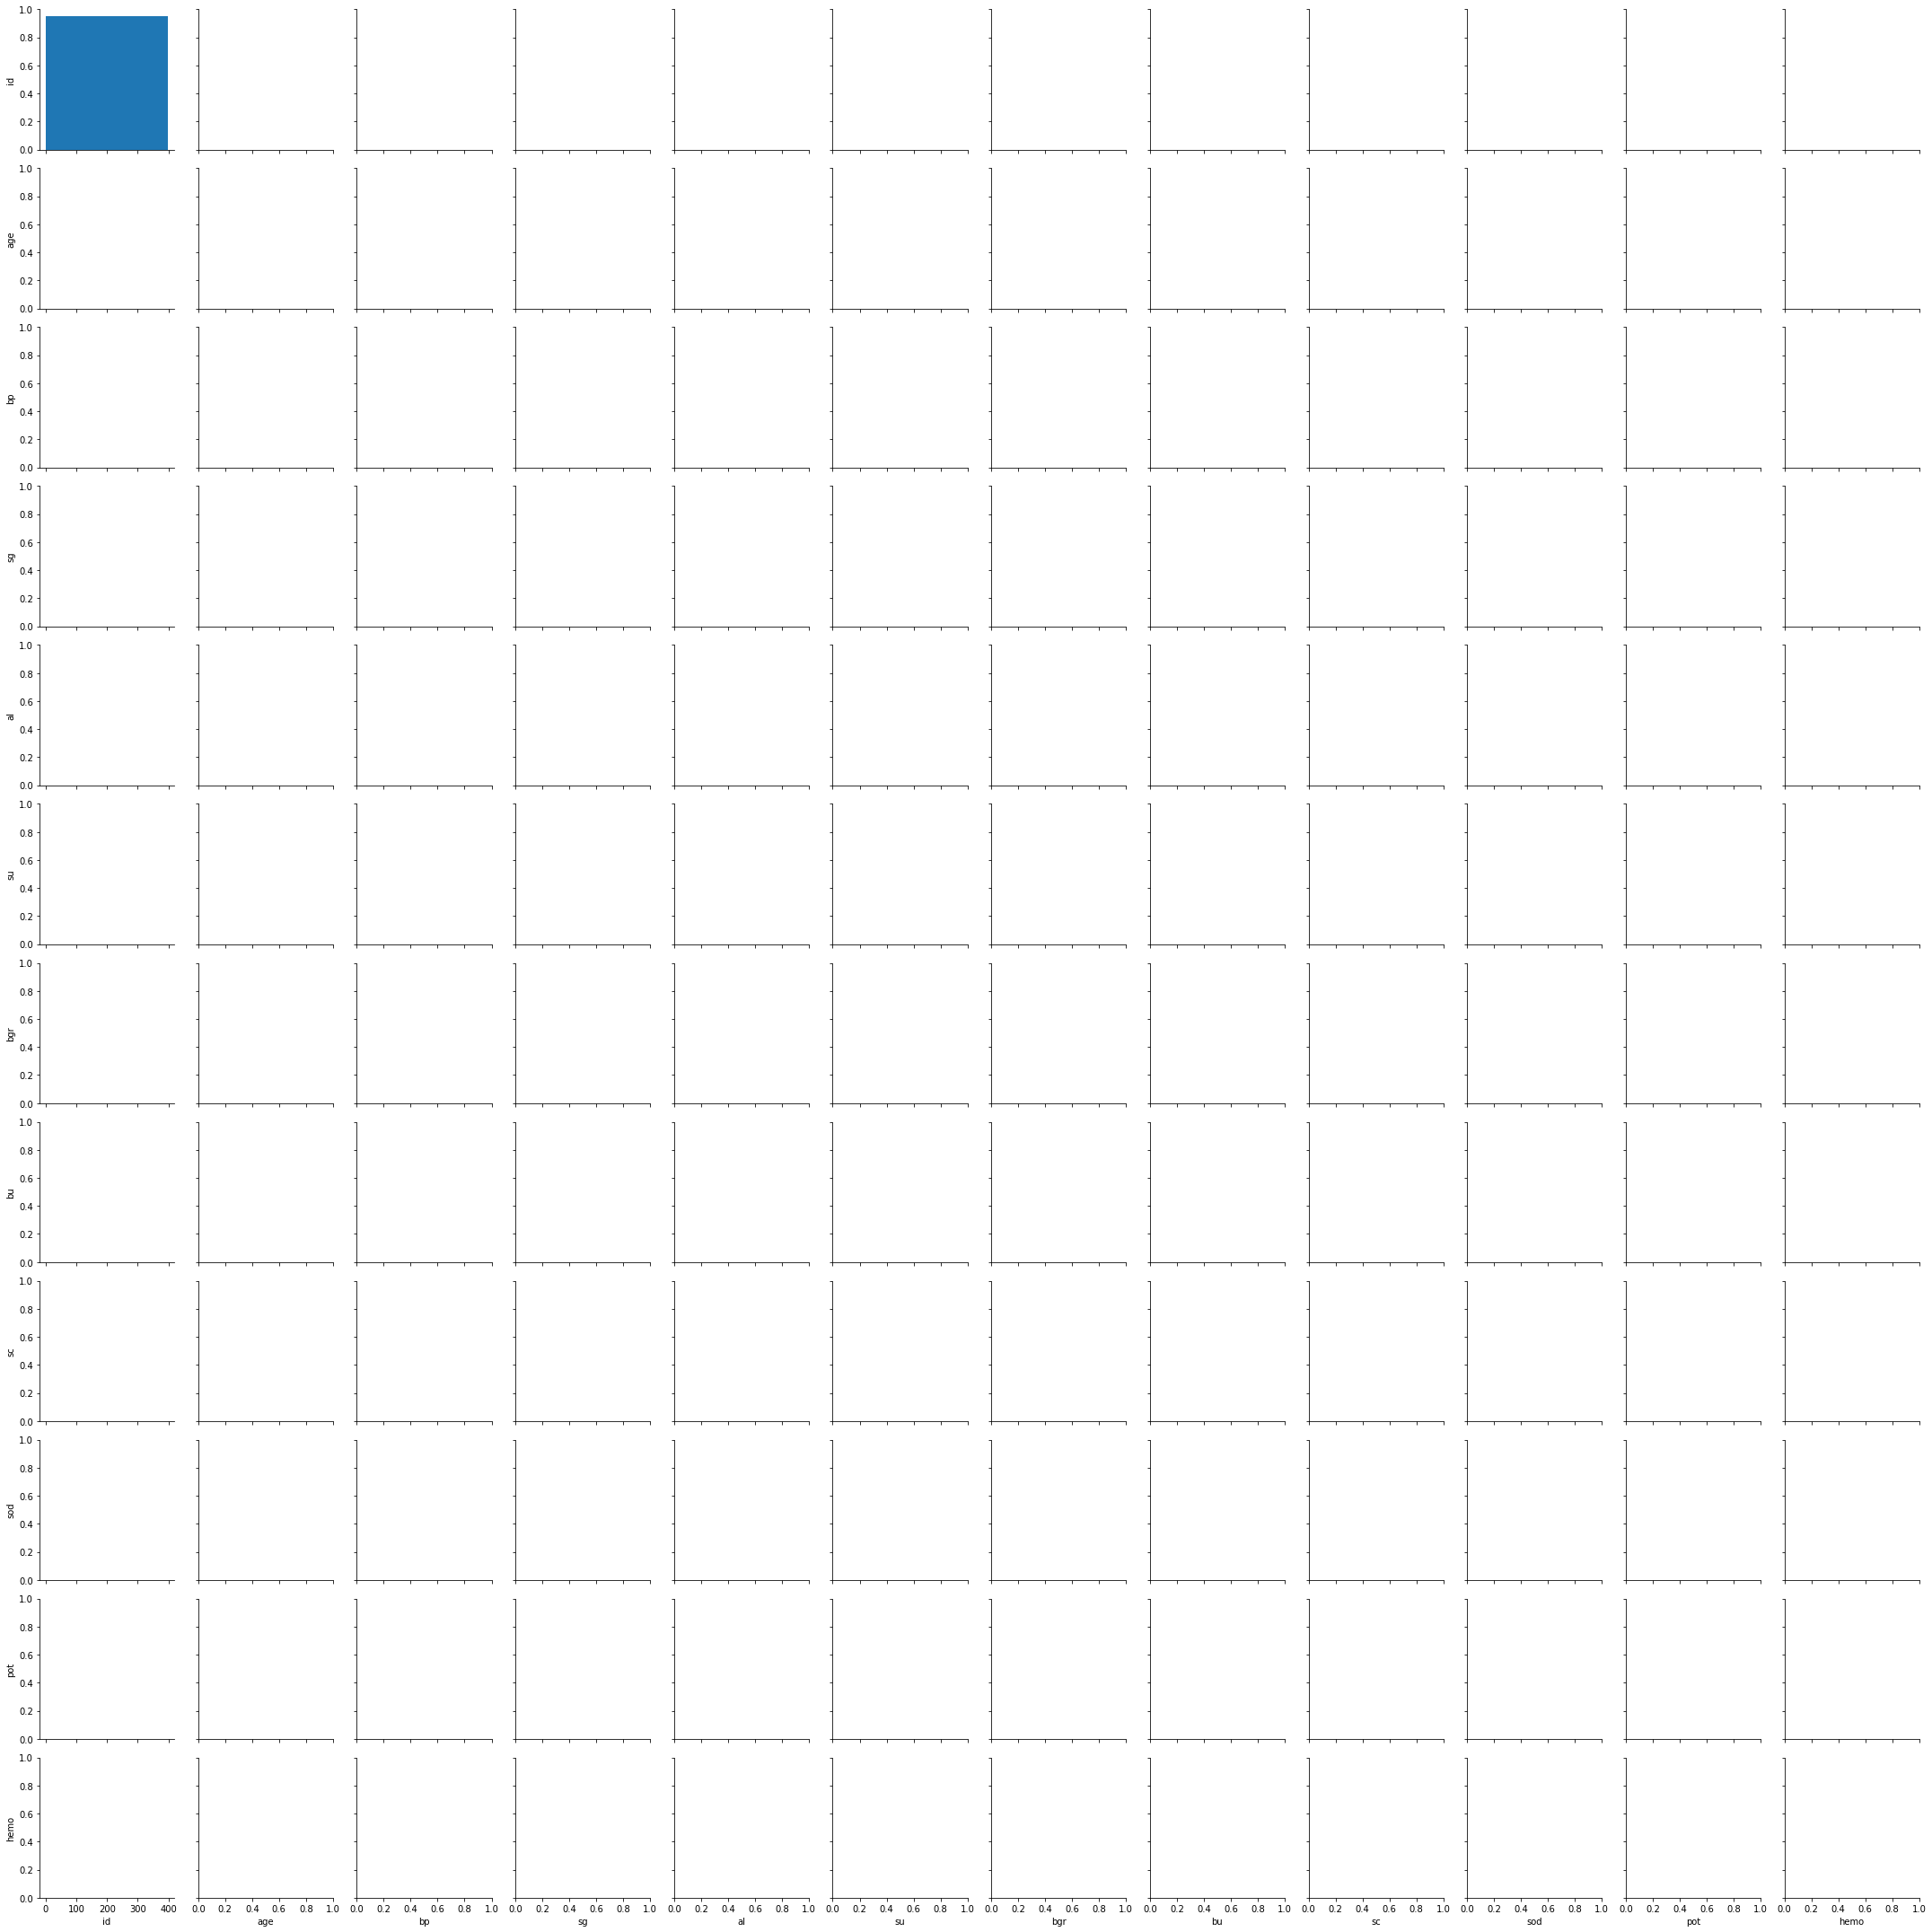

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

g = sns.pairplot(data, size=2.5)

for i, j in zip(*np.triu_indices_from(g.axes, 1)):
    g.axes[i, j].set_visible(False)

## Boxplot


In [47]:
data.drop(['wc'], axis=1).iplot(kind='box')